In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("dataset/SaratogaHouses.csv")
dataset.drop("Unnamed", axis=1, inplace=True)

In [3]:
dataset.head()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes


In [4]:
x = dataset["livingArea"].values
y = dataset["price"].values

In [5]:
x, y

(array([ 906, 1953, 1944, ..., 1099, 1225, 1959]),
 array([132500, 181115, 109000, ..., 194900, 125000, 111300]))

In [6]:
mean_x = np.mean(x)
mean_y = np.mean(y)

In [7]:
mean_x, mean_y

(1754.9756944444443, 211966.7054398148)

In [8]:
numer = 0
denom = 0

for i in range( len( x ) ):
    numer += (x[i] - mean_x) * (y[i] - mean_y)
    denom += (x[i] - mean_x) ** 2
    
slope = numer / denom
c = mean_y - slope * mean_x

In [9]:
slope, c

(113.1225418468094, 13439.394004889764)

In [10]:
from scipy.stats import linregress

In [11]:
linregress(x,y)

LinregressResult(slope=113.12254184680961, intercept=13439.394004889386, rvalue=0.7123902334268238, pvalue=9.486239939676993e-268, stderr=2.6823410034486286)

In [12]:
predictions = []
for i in range(len(x)):
    y_pred = slope * x[i] + c
    predictions.append(y_pred)

In [13]:
y[:10]

array([132500, 181115, 109000, 155000,  86060, 120000, 153000, 170000,
        90000, 122900])

In [14]:
print(predictions[:10])

[115928.41691809907, 234367.7182317085, 233349.61535508724, 233349.61535508724, 108462.32915620966, 143756.5622124142, 324752.6291673092, 201449.05855428698, 198055.3822988827, 173620.91325997186]


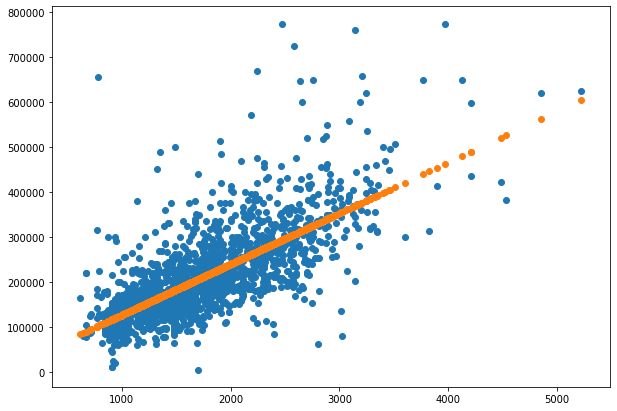

In [15]:
plt.figure(figsize=(10,7))
plt.scatter(x,y)
plt.scatter(x,predictions)

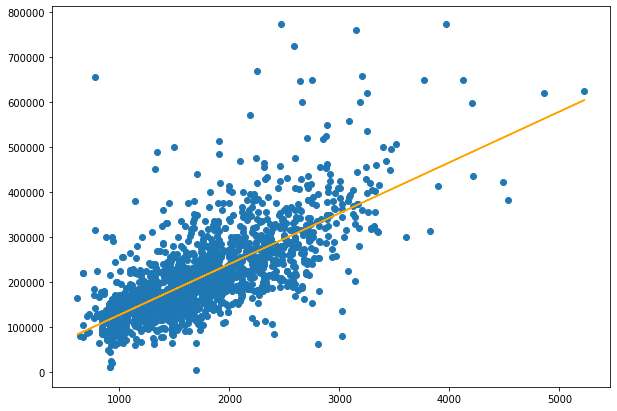

In [16]:
plt.figure(figsize=(10,7))
plt.scatter(x,y)
plt.plot(x,predictions, color='orange')

In [17]:
numer = 0
denom = len(x)
for i in range(len(x)):
    numer += (predictions[i] - y[i]) ** 2
    
#MSE - Mean Squared Error
mse = numer / denom

#RMSE - Root Mean Squared Error
rmse = np.sqrt(mse)

In [18]:
mse, rmse

(4769912967.014983, 69064.55651790564)

In [19]:
newX = 990
pred_y = slope * newX + c

In [20]:
pred_y

125430.71043323107

In [21]:
newX = x[0]
pred_y = slope * newX + c

In [22]:
pred_y, y[0]

(115928.41691809907, 132500)

In [23]:
pred_y - y[0]

-16571.583081900928

In [25]:
# Optimization
# - Gradient Descent

# y[0] + y[1] + y[2] = m * (x[0] + x[1] + x[2]) + c
# y[0] + y[1] + y[2] = b0 + b1 * (x[0] + x[1] + x[2])
# y[0] + y[1] + y[2] = b0 + (b1 * (x[0] + x[1] + x[2])) + (b2 * (x2[0] + x2[1] + x2[2]))

In [28]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

In [29]:
dataset = pd.read_csv('dataset/SaratogaHouses.csv')

In [30]:
x = dataset['livingArea'].values
y = dataset['price'].values

In [33]:
x.shape

(1728,)

In [37]:
x.reshape(x.shape[0],1)

array([[ 906],
       [1953],
       [1944],
       ...,
       [1099],
       [1225],
       [1959]])

In [38]:
x.reshape(-1,1)

array([[ 906],
       [1953],
       [1944],
       ...,
       [1099],
       [1225],
       [1959]])

In [35]:
x = x.reshape(1728,1)

In [39]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
y_pred = reg.predict(x)

In [41]:
y[:10]

array([132500, 181115, 109000, 155000,  86060, 120000, 153000, 170000,
        90000, 122900])

In [42]:
y_pred[:10]

array([115928.4169181 , 234367.71823171, 233349.61535509, 233349.61535509,
       108462.32915621, 143756.56221241, 324752.62916731, 201449.05855429,
       198055.38229888, 173620.91325997])

In [49]:
reg.predict( [[906]] )

array([1144664.81247298])

In [44]:
reg.coef_

array([113.12254185])

In [45]:
# Data Preprocessing
# - Handle missing values
# - Feature Scaling (Normalisation, Standardisation)
# - Label Encoding (One Hot Encoding)
# - Train Test split - Overfitting and Underfitting

### Checking after train test split

In [50]:
from sklearn.model_selection import train_test_split

In [54]:
np.random.seed(5)

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

In [56]:
x_train[0]

array([2737])

In [57]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1382, 1), (346, 1), (1382,), (346,))

In [58]:
reg2 = LinearRegression()
reg2.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
y_pred = reg2.predict(x_test)

In [60]:
from sklearn.metrics import mean_squared_error

In [61]:
mse = mean_squared_error(y_test, y_pred)

In [62]:
mse

4010624743.688915

In [63]:
np.sqrt(mse)

63329.49347412243